## Imports: libraries and dataset

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import itertools
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

In [118]:
# Load the dataset
df = pd.read_csv('../../dataset/KAG_energydata_complete.csv')

# Convert the 'date' column to datetime format and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

## Arima model

In [139]:
# Focusing on the 'Appliances' energy consumption
series = df['Appliances']

In [140]:
# Perform ADF test to check for stationarity
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -21.61637819803621
p-value: 0.0


In [141]:
# If the p-value is greater than 0.05, difference the series
if result[1] > 0.05:
    series = series.diff().dropna()

In [142]:
# Parameter tuning for ARIMA using a smaller range for efficiency
p = d = q = range(0, 3)
best_aic = float("inf")
best_params = None
num_combinations = len(list(itertools.product(p, d, q)))

print(f"Total combinations to evaluate: {num_combinations}")

Total combinations to evaluate: 27


In [143]:
count = 0

for param in itertools.product(p, d, q):
    count += 1
    print(f"Evaluating combination {count}/{num_combinations}: ARIMA{param}")
    try:
        model = ARIMA(series, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except Exception as e:
        print(f"Combination {param} failed with error: {e}")
        continue

print('Best ARIMA parameters:', best_params)
print('Best AIC:', best_aic)


Evaluating combination 1/27: ARIMA(0, 0, 0)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 2/27: ARIMA(0, 0, 1)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 3/27: ARIMA(0, 0, 2)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 4/27: ARIMA(0, 1, 0)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 5/27: ARIMA(0, 1, 1)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 6/27: ARIMA(0, 1, 2)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 7/27: ARIMA(0, 2, 0)
Evaluating combination 8/27: ARIMA(0, 2, 1)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferr

Evaluating combination 9/27: ARIMA(0, 2, 2)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Evaluating combination 10/27: ARIMA(1, 0, 0)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 11/27: ARIMA(1, 0, 1)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 12/27: ARIMA(1, 0, 2)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 13/27: ARIMA(1, 1, 0)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 14/27: ARIMA(1, 1, 1)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 15/27: ARIMA(1, 1, 2)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 16/27: ARIMA(1, 2, 0)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 17/27: ARIMA(1, 2, 1)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 18/27: ARIMA(1, 2, 2)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Evaluating combination 19/27: ARIMA(2, 0, 0)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 20/27: ARIMA(2, 0, 1)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non

Evaluating combination 21/27: ARIMA(2, 0, 2)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 22/27: ARIMA(2, 1, 0)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 23/27: ARIMA(2, 1, 1)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 24/27: ARIMA(2, 1, 2)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 25/27: ARIMA(2, 2, 0)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 26/27: ARIMA(2, 2, 1)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Evaluating combination 27/27: ARIMA(2, 2, 2)


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA parameters: (2, 0, 2)
Best AIC: 221345.8773147678


In [144]:
# Fit the ARIMA model with the best parameters
model = ARIMA(series, order=best_params)
model_fit = model.fit()

/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


In [145]:
# Forecast
forecast_steps = 30  # Forecast for 30 time steps ahead
forecast = model_fit.forecast(steps=forecast_steps)

In [146]:
# Evaluate the model
y_train = series[:-forecast_steps]
y_test = series[-forecast_steps:]
y_pred = model_fit.predict(start=len(series)-forecast_steps, end=len(series)-1)

arima_mae = mean_absolute_error(y_test, y_pred)
arima_mse = mean_squared_error(y_test, y_pred)
arima_rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', arima_mae)
print('Mean Squared Error (MSE):', arima_mse)
print('Root Mean Squared Error (RMSE):', arima_rmse)

Mean Absolute Error (MAE): 39.73663515185555
Mean Squared Error (MSE): 3713.644219823917
Root Mean Squared Error (RMSE): 28.46842940536354


## Sarima model

In [127]:
# Focusing on the 'Appliances' energy consumption and selecting exogenous variables
series = df['Appliances']
# exog = df[['T1', 'RH_1', 'T2', 'RH_2', 'T_out', 'RH_out']]

In [128]:
# Fit the SARIMAX model with the selected parameters and exogenous variables
model = SARIMAX(series,
                order=(2, 0, 2),
                seasonal_order=(1, 0, 1, 24),
                #exog=exog,
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Print summary of the model
print(model_fit.summary())

/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                           Appliances   No. Observations:                19735
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 24)   Log Likelihood             -110623.187
Date:                              Sun, 07 Jul 2024   AIC                         221260.373
Time:                                      22:09:25   BIC                         221315.595
Sample:                                  01-11-2016   HQIC                        221278.453
                                       - 05-27-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4069      0.009    154.128      0.000       1.389       1.425
ar.L2         -0.41

In [129]:
# Forecast
forecast_steps = 30  # Forecast for 30 time steps ahead
# exog_forecast = exog.iloc[-forecast_steps:].reset_index(drop=True)
# forecast = model_fit.forecast(steps=forecast_steps, exog=exog_forecast)
forecast = model_fit.forecast(steps=forecast_steps)

In [130]:
# Evaluate the model
y_train = series[:-forecast_steps]
y_test = series[-forecast_steps:]
# y_pred = model_fit.predict(start=len(series)-forecast_steps, end=len(series)-1, exog=exog_forecast)
y_pred = model_fit.predict(start=len(series)-forecast_steps, end=len(series)-1)


sarima_mae = mean_absolute_error(y_test, y_pred)
sarima_mse = mean_squared_error(y_test, y_pred)
sarima_rmse = np.sqrt(sarima_mse)

print('Mean Absolute Error (MAE):', sarima_mae)
print('Mean Squared Error (MSE):', sarima_mse)
print('Root Mean Squared Error (RMSE):', sarima_rmse)

Mean Absolute Error (MAE): 42.12906344304756
Mean Squared Error (MSE): 3892.527091971792
Root Mean Squared Error (RMSE): 62.39012014711778


By removing the other independent variables, the sarima model improved marginally

## ETS model

In [131]:
# Resample the data to daily frequency and take the mean
daily_data = df['Appliances'].resample('D').mean()

In [132]:
# Fit an ETS model
ets_model = sm.tsa.ExponentialSmoothing(daily_data, trend='add', seasonal='add', seasonal_periods=7).fit()

In [133]:
# Summary of the ETS model
ets_summary = ets_model.summary()
print(ets_summary)

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Appliances   No. Observations:                  138
Model:             ExponentialSmoothing   SSE                         116961.349
Optimized:                         True   AIC                            952.444
Trend:                         Additive   BIC                            984.643
Seasonal:                      Additive   AICC                           955.379
Seasonal Periods:                     7   Date:                 Sun, 07 Jul 2024
Box-Cox:                          False   Time:                         22:09:25
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0015547                alpha                 True
smoothing_trend          

In [134]:
# Forecasting
forecast_steps = 30  # Forecast for the next 30 days
ets_forecast = ets_model.forecast(steps=forecast_steps)

actual_values = daily_data[-forecast_steps:]  # Actual values for the forecast period

In [135]:
# Calculate error metrics
ets_mae = mean_absolute_error(actual_values, ets_forecast)
ets_mse = mean_squared_error(actual_values, ets_forecast)
ets_rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', ets_mae)
print('Mean Squared Error (MSE):', ets_mse)
print('Root Mean Squared Error (RMSE):', ets_rmse)



Mean Absolute Error (MAE): 22.431589723638545
Mean Squared Error (MSE): 750.3905228770386
Root Mean Squared Error (RMSE): 28.46842940536354


In [136]:
z_scores = (ets_forecast - actual_values.mean()) / actual_values.std()
print('Z-scores:', z_scores)

Z-scores: 2016-05-28    0.257633
2016-05-29   -0.139257
2016-05-30    0.461618
2016-05-31   -0.432346
2016-06-01   -0.325833
2016-06-02   -0.299588
2016-06-03    0.196749
2016-06-04    0.249665
2016-06-05   -0.147226
2016-06-06    0.453650
2016-06-07   -0.440315
2016-06-08   -0.333802
2016-06-09   -0.307557
2016-06-10    0.188780
2016-06-11    0.241696
2016-06-12   -0.155194
2016-06-13    0.445681
2016-06-14   -0.448283
2016-06-15   -0.341770
2016-06-16   -0.315525
2016-06-17    0.180812
2016-06-18    0.233728
2016-06-19   -0.163163
2016-06-20    0.437713
2016-06-21   -0.456252
2016-06-22   -0.349739
2016-06-23   -0.323494
2016-06-24    0.172843
2016-06-25    0.225759
2016-06-26   -0.171132
Freq: D, dtype: float64


Using cross validation, it makes the results worse but we have robustness and we avoid overfitting

In [137]:
from sklearn.model_selection import TimeSeriesSplit


# Initialize the cross-validation split
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store metrics for each split
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in tscv.split(daily_data):
    train, test = daily_data.iloc[train_index], daily_data.iloc[test_index]
    
    # Fit the ETS model
    ets_model = sm.tsa.ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()
    
    # Forecasting
    forecast_steps = len(test)
    ets_forecast = ets_model.forecast(steps=forecast_steps)
    
    # Calculate error metrics
    mae = mean_absolute_error(test, ets_forecast)
    mse = mean_squared_error(test, ets_forecast)
    rmse = np.sqrt(mse)
    r_squared = r2_score(test, ets_forecast)
    
    
    # Append metrics to lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r_squared)
    
    
# Print average metrics
print('Average Mean Absolute Error (MAE):', np.mean(mae_list))
print('Average Mean Squared Error (MSE):', np.mean(mse_list))
print('Average Root Mean Squared Error (RMSE):', np.mean(rmse_list))
print('Average R-squared Error (R^2):', np.mean(r2_list))

Average Mean Absolute Error (MAE): 27.940179986758874
Average Mean Squared Error (MSE): 1377.7538621066549
Average Root Mean Squared Error (RMSE): 35.809374523066126
Average R-squared Error (R^2): -1.2044332583785624


## VAR model

In [81]:
# Select the relevant columns for multivariate analysis
multivariate_df = df[['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T_out', 'RH_out']].dropna()

In [82]:
# Split data into training and testing sets
train_size = int(len(multivariate_df) * 0.8)
train, test = multivariate_df[:train_size], multivariate_df[train_size:]

In [ ]:
# Fit the VAR model
model = VAR(train)
model_fit = model.fit(maxlags=15, ic='aic')  # You can tune maxlags and information criteria (ic)


In [86]:
# Make predictions
forecast_steps = len(test)
forecast = model_fit.forecast(model_fit.endog, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)


In [87]:
# Evaluate the model
mae = mean_absolute_error(test['Appliances'], forecast_df['Appliances'])
mse = mean_squared_error(test['Appliances'], forecast_df['Appliances'])
rmse = np.sqrt(mse)
r_squared = r2_score(test['Appliances'], forecast_df['Appliances'])

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared:', r_squared)

Mean Absolute Error (MAE): 52.42465673502153
Mean Squared Error (MSE): 8198.192148299813
Root Mean Squared Error (RMSE): 90.54386864001236
R-squared: 0.010837553466037542


## Results

/tmp/ipykernel_67392/315416539.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(models, rotation=45)
/tmp/ipykernel_67392/315416539.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(models, rotation=45)
/tmp/ipykernel_67392/315416539.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(models, rotation=45)


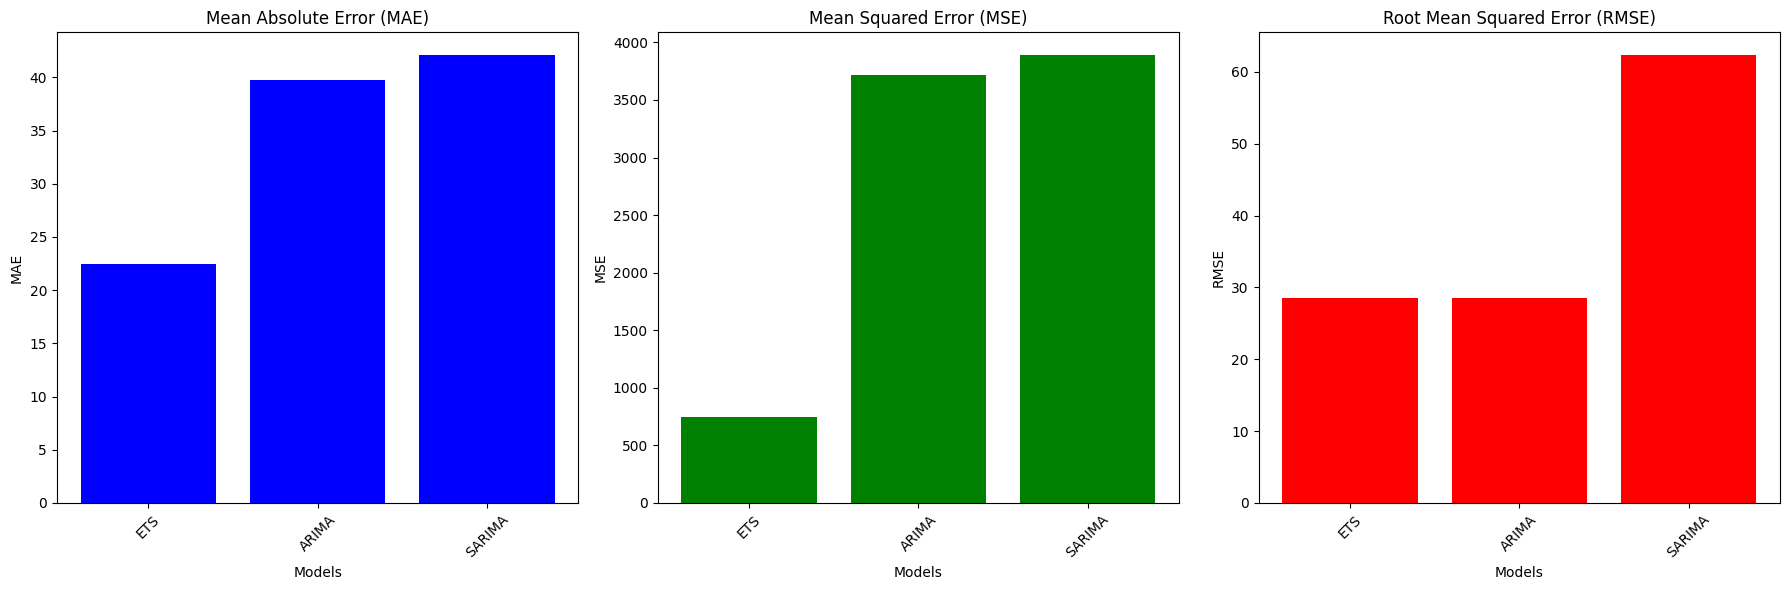

In [147]:
models = ['ETS', 'ARIMA', 'SARIMA']

mae_values = [ets_mae, arima_mae, sarima_mae]
mse_values = [ets_mse, arima_mse, sarima_mse ]
rmse_values = [ets_rmse, arima_rmse, sarima_rmse]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting MAE
axes[0].bar(models, mae_values, color='blue')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('MAE')
axes[0].set_xticklabels(models, rotation=45)

# Plotting MSE
axes[1].bar(models, mse_values, color='green')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('MSE')
axes[1].set_xticklabels(models, rotation=45)

# Plotting RMSE
axes[2].bar(models, rmse_values, color='red')
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('RMSE')
axes[2].set_xticklabels(models, rotation=45)

plt.tight_layout()
plt.show()